## Importing required Libraries

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


## Data Import 

In [3]:
df_clean_combined = pd.read_csv('clean_combined_data.csv')

df_clean_combined

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State(Abbreviated),ZIP Code
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,136 Church St,New York City,NY,10001
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,562 2nd St,New York City,NY,10001
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,277 Main St,New York City,NY,10001
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,410 6th St,San Francisco,CA,94016
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,43 Hill St,Atlanta,GA,30301
...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,6/7/2019 19:02,795 Pine St,Boston,MA,2215
185946,222906,27in FHD Monitor,1,149.99,6/1/2019 19:29,495 North St,New York City,NY,10001
185947,222907,USB-C Charging Cable,1,11.95,6/22/2019 18:57,319 Ridge St,San Francisco,CA,94016
185948,222908,USB-C Charging Cable,1,11.95,6/26/2019 18:35,916 Main St,San Francisco,CA,94016


## Exploring the Dataset

In [4]:
# Code to identify the dataframe dimension

df_clean_combined.shape

(185950, 9)

##### Result: dataframe has 9 columns and 185,950 rows of data

In [5]:
# Code to generate summary statistics

df_clean_combined.describe()

,Order ID,Quantity Ordered,Price Each,ZIP Code
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,63877.518935
std,51512.737110,0.442793,332.731330,37776.308300
min,141234.000000,1.000000,2.990000,2215.000000
25%,185831.250000,1.000000,11.950000,10001.000000
50%,230367.500000,1.000000,14.950000,90001.000000
75%,275035.750000,1.000000,150.000000,94016.000000
max,319670.000000,9.000000,1700.000000,98101.000000


##### Result: No missing data and no zero value

In [6]:
# Code to identify data types

df_clean_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            185950 non-null  int64  
 1   Product             185950 non-null  object 
 2   Quantity Ordered    185950 non-null  int64  
 3   Price Each          185950 non-null  float64
 4   Order Date          185950 non-null  object 
 5   Purchase Address    185950 non-null  object 
 6   City                185950 non-null  object 
 7   State(Abbreviated)  185950 non-null  object 
 8   ZIP Code            185950 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 12.8+ MB


##### Result: Some Columns have data type "object" and would need to be changed into their correct data type in the data cleaning step. 

## Data Cleaning

#### 1. Changing data type for columns Product, Purchase Address, City  & State from object to string

In [7]:
df_clean_combined = df_clean_combined.astype({'Product':'string', 'Purchase Address':'string', 'City':'string', 'State(Abbreviated)':'string'})

In [8]:
df_clean_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            185950 non-null  int64  
 1   Product             185950 non-null  string 
 2   Quantity Ordered    185950 non-null  int64  
 3   Price Each          185950 non-null  float64
 4   Order Date          185950 non-null  object 
 5   Purchase Address    185950 non-null  string 
 6   City                185950 non-null  string 
 7   State(Abbreviated)  185950 non-null  string 
 8   ZIP Code            185950 non-null  int64  
dtypes: float64(1), int64(3), object(1), string(4)
memory usage: 12.8+ MB


##### Result: object data type for Product, Purchase Address, City & State updated to string.

##### 2. Checking and Removing duplicate data

In [9]:
# Code to confirm the number of rows of data in each column.

df_clean_combined.count() 

Order ID              185950
Product               185950
Quantity Ordered      185950
Price Each            185950
Order Date            185950
Purchase Address      185950
City                  185950
State(Abbreviated)    185950
ZIP Code              185950
dtype: int64

In [10]:
# Code to identify number of duplicate data

duplicate_rows_df = df_clean_combined[df_clean_combined.duplicated()]

print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (264, 9)


##### Result: There are 264 rows of duplicate data.

In [11]:
# Code to remove duplicate data

df_clean_combined = df_clean_combined.drop_duplicates()

# Code to validate duplicate data has been removed

df_clean_combined.shape

(185686, 9)

##### Result: Number of rows of data reduced from 185950 to 185686

In [12]:
df_clean_combined

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State(Abbreviated),ZIP Code
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,136 Church St,New York City,NY,10001
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,562 2nd St,New York City,NY,10001
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,277 Main St,New York City,NY,10001
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,410 6th St,San Francisco,CA,94016
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,43 Hill St,Atlanta,GA,30301
...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,6/7/2019 19:02,795 Pine St,Boston,MA,2215
185946,222906,27in FHD Monitor,1,149.99,6/1/2019 19:29,495 North St,New York City,NY,10001
185947,222907,USB-C Charging Cable,1,11.95,6/22/2019 18:57,319 Ridge St,San Francisco,CA,94016
185948,222908,USB-C Charging Cable,1,11.95,6/26/2019 18:35,916 Main St,San Francisco,CA,94016


##### 3. Splitting Order date into Day, Month, Year, Hour & Minute.

In [13]:
df_clean_combined[["Month", "Day", "Year",]] = df_clean_combined["Order Date"].str.split("/", expand = True)

df_clean_combined

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State(Abbreviated),ZIP Code,Month,Day,Year
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,136 Church St,New York City,NY,10001,12,30,2019 0:01
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,562 2nd St,New York City,NY,10001,12,29,2019 7:03
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,277 Main St,New York City,NY,10001,12,12,2019 18:21
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,410 6th St,San Francisco,CA,94016,12,22,2019 15:13
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,43 Hill St,Atlanta,GA,30301,12,18,2019 12:38
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,6/7/2019 19:02,795 Pine St,Boston,MA,2215,6,7,2019 19:02
185946,222906,27in FHD Monitor,1,149.99,6/1/2019 19:29,495 North St,New York City,NY,10001,6,1,2019 19:29
185947,222907,USB-C Charging Cable,1,11.95,6/22/2019 18:57,319 Ridge St,San Francisco,CA,94016,6,22,2019 18:57
185948,222908,USB-C Charging Cable,1,11.95,6/26/2019 18:35,916 Main St,San Francisco,CA,94016,6,26,2019 18:35


In [14]:
df_clean_combined[['Year','Time']] = df_clean_combined["Year"].str.split(" ", expand = True)

df_clean_combined

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State(Abbreviated),ZIP Code,Month,Day,Year,Time
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,136 Church St,New York City,NY,10001,12,30,2019,0:01
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,562 2nd St,New York City,NY,10001,12,29,2019,7:03
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,277 Main St,New York City,NY,10001,12,12,2019,18:21
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,410 6th St,San Francisco,CA,94016,12,22,2019,15:13
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,43 Hill St,Atlanta,GA,30301,12,18,2019,12:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,6/7/2019 19:02,795 Pine St,Boston,MA,2215,6,7,2019,19:02
185946,222906,27in FHD Monitor,1,149.99,6/1/2019 19:29,495 North St,New York City,NY,10001,6,1,2019,19:29
185947,222907,USB-C Charging Cable,1,11.95,6/22/2019 18:57,319 Ridge St,San Francisco,CA,94016,6,22,2019,18:57
185948,222908,USB-C Charging Cable,1,11.95,6/26/2019 18:35,916 Main St,San Francisco,CA,94016,6,26,2019,18:35


In [15]:
df_clean_combined[['Hour','Minute']] = df_clean_combined["Time"].str.split(":", expand = True)

df_clean_combined

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State(Abbreviated),ZIP Code,Month,Day,Year,Time,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,136 Church St,New York City,NY,10001,12,30,2019,0:01,0,01
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,562 2nd St,New York City,NY,10001,12,29,2019,7:03,7,03
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,277 Main St,New York City,NY,10001,12,12,2019,18:21,18,21
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,410 6th St,San Francisco,CA,94016,12,22,2019,15:13,15,13
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,43 Hill St,Atlanta,GA,30301,12,18,2019,12:38,12,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,6/7/2019 19:02,795 Pine St,Boston,MA,2215,6,7,2019,19:02,19,02
185946,222906,27in FHD Monitor,1,149.99,6/1/2019 19:29,495 North St,New York City,NY,10001,6,1,2019,19:29,19,29
185947,222907,USB-C Charging Cable,1,11.95,6/22/2019 18:57,319 Ridge St,San Francisco,CA,94016,6,22,2019,18:57,18,57
185948,222908,USB-C Charging Cable,1,11.95,6/26/2019 18:35,916 Main St,San Francisco,CA,94016,6,26,2019,18:35,18,35


## Data Visualizations

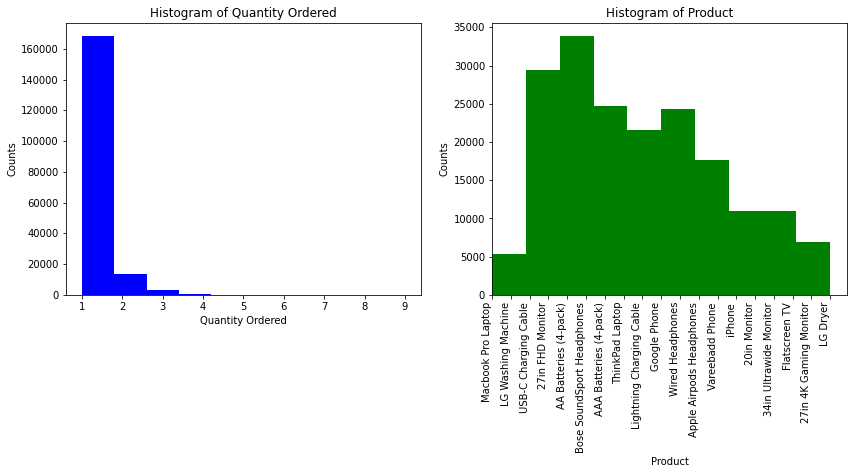

In [16]:
fig, axes = plt.subplots(nrows = 1, 
                         ncols = 2, 
                         figsize=(14, 5)       
                        )

# Plot 0
axes[0].hist(df_clean_combined['Quantity Ordered'], bins=10, color='blue')
axes[0].set_title('Histogram of Quantity Ordered')
axes[0].set_xlabel('Quantity Ordered')
axes[0].set_ylabel('Counts')


# Plot 1
axes[1].hist(df_clean_combined['Product'], bins=10, color='green')
axes[1].set_title('Histogram of Product')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Counts')
axes[1].set_xlim(left=0)
plt.xticks(rotation=90, ha='right')

plt.show()

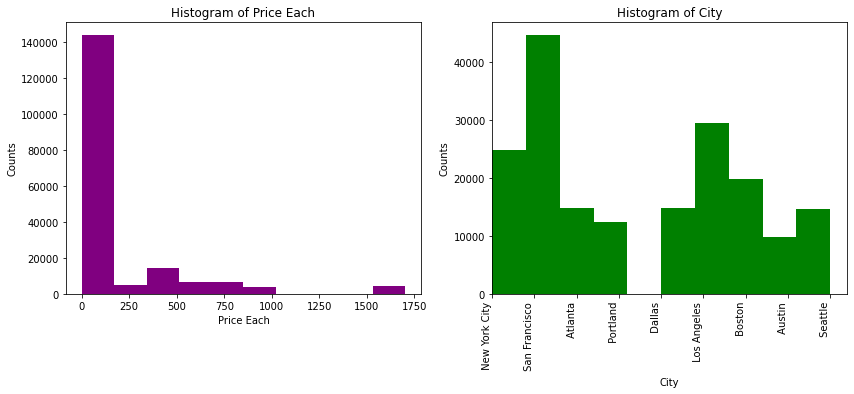

In [17]:
fig, axes = plt.subplots(nrows = 1, 
                         ncols = 2, 
                         figsize=(14, 5)       
                        )

# Plot 0
axes[0].hist(df_clean_combined['Price Each'], bins=10, color='purple')
axes[0].set_title('Histogram of Price Each')
axes[0].set_xlabel('Price Each')
axes[0].set_ylabel('Counts')


# Plot 1
axes[1].hist(df_clean_combined['City'], bins=10, color='green')
axes[1].set_title('Histogram of City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Counts')
axes[1].set_xlim(left=0)
plt.xticks(rotation=90, ha='right')

plt.show()

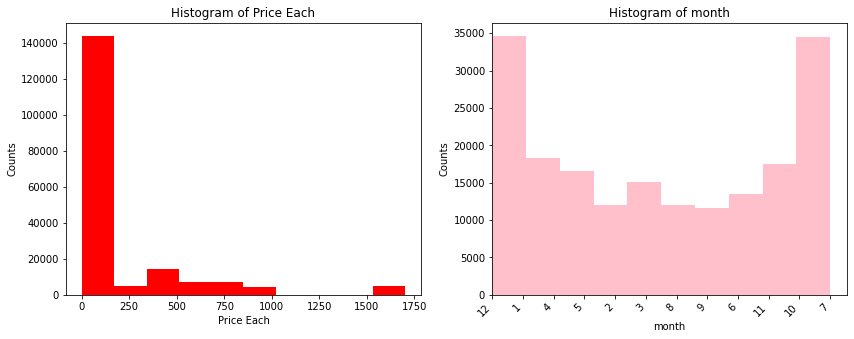

In [18]:
fig, axes = plt.subplots(nrows = 1, 
                         ncols = 2, 
                         figsize=(14, 5)       
                        )

# Plot 0
axes[0].hist(df_clean_combined['Price Each'], bins=10, color='red')
axes[0].set_title('Histogram of Price Each')
axes[0].set_xlabel('Price Each')
axes[0].set_ylabel('Counts')


# Plot 1
axes[1].hist(df_clean_combined['Month'], bins=10, color='pink')
axes[1].set_title('Histogram of month')
axes[1].set_xlabel('month')
axes[1].set_ylabel('Counts')
axes[1].set_xlim(left=0)
plt.xticks(rotation=45, ha='right')

plt.show()

/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


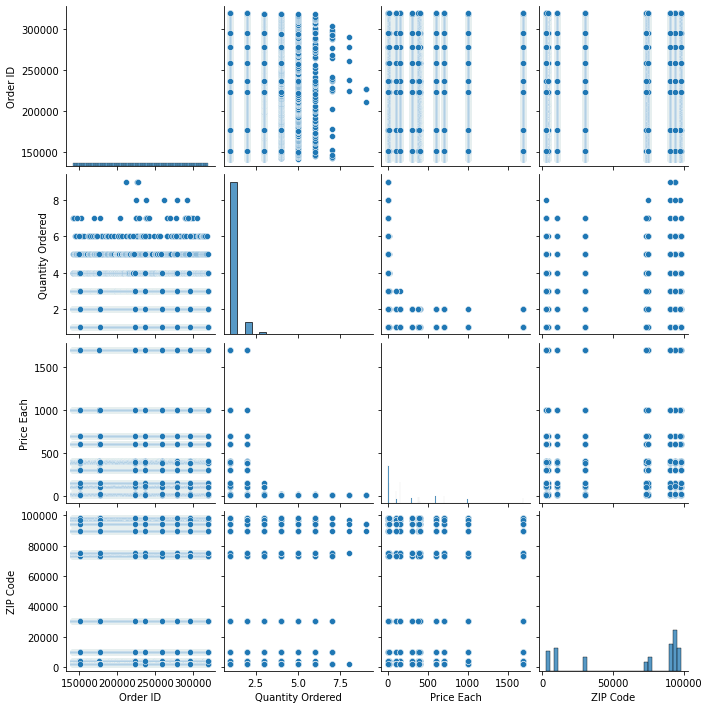

In [19]:
sns.pairplot(df_clean_combined)
plt.show()


### model for predicting values of quantity ordered

In [149]:
df_clean_combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State(Abbreviated),ZIP Code,Month,Day,Year,Time,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,136 Church St,New York City,NY,10001,12,30,2019,0:01,0,01
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,562 2nd St,New York City,NY,10001,12,29,2019,7:03,7,03
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,277 Main St,New York City,NY,10001,12,12,2019,18:21,18,21
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,410 6th St,San Francisco,CA,94016,12,22,2019,15:13,15,13
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,43 Hill St,Atlanta,GA,30301,12,18,2019,12:38,12,38


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'data' is your DataFrame with "Price Each" and "Quantity Ordered" columns
X = df_clean_combined[['Price Each']]  # Features (Price Each)
y = df_clean_combined["Quantity Ordered"]  # Target (Quantity ordered)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate RMSE to evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"Root Mean Squared Error: {rmse}")


NameError: name 'df_clean_combined' is not defined

In [156]:
print(model.predict([[10]]))

[1.16038511]


/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Hypothesis Testing --- Needs Review ##

In [ ]:
import statsmodels.api as sm

import scipy as sp

<Axes: xlabel='Quantity Ordered', ylabel='Price Each'>

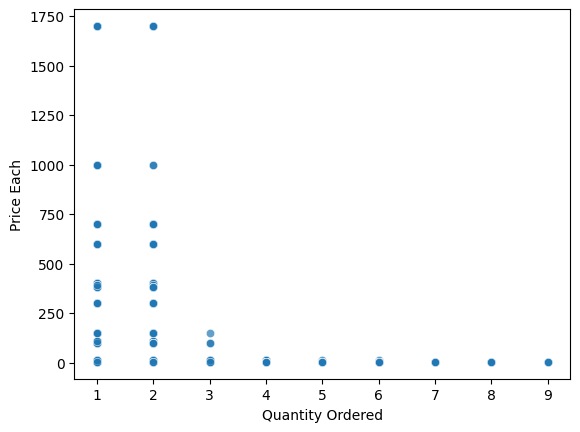

In [ ]:
sns.scatterplot(x=df_clean_combined['Quantity Ordered'], y=df_clean_combined['Price Each'], alpha=0.7)

Hypothesis 

Null Hypothesis is that price affects the quantity of products ordered

H0 is the default (assumed) belief, and we are interested in if there is enough evidence overturn H0 and instead conclude that Ha is true.


Scatterplot

“The scatterplot between these two variables suggest they may be linearly correlated”
(use Pearson)




A statistical test used to determine if there is enough evidence to support a hypothesis
A formal (statistical) way to test for significance.
E.g. Is the correlation significant or not?
E.g. Is our data normally distributed or not?
E.g. Are two variables independent or not?
E.g. Is there a difference in the average between two groups of data or not?

wE WILL BE USING Pearson’s Correlation Coefficient (numerical values)



In [ ]:
norm_columns = ['Quantity Ordered', 'Price Each']

df_clean_combined[norm_columns] = df_clean_combined[norm_columns] / df_clean_combined[norm_columns].sum()

<Axes: xlabel='Quantity Ordered', ylabel='Price Each'>

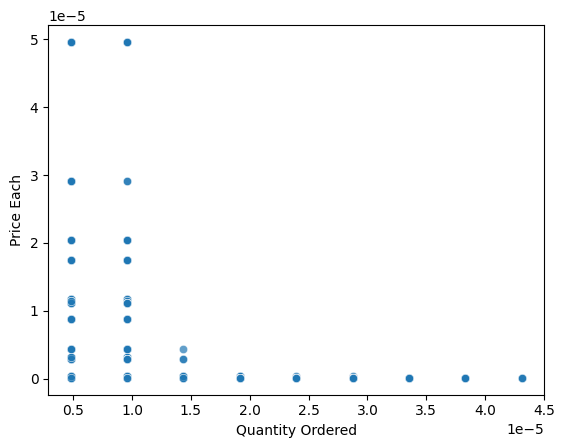

In [ ]:
sns.scatterplot(x=df_clean_combined['Quantity Ordered'], y=df_clean_combined['Price Each'], alpha=0.7)

In [ ]:
from scipy import stats

In [ ]:
stat, p = stats.pearsonr(df_clean_combined['Quantity Ordered'], y=df_clean_combined['Price Each'],)

print('%0.60f' % p)

0.000000000000000000000000000000000000000000000000000000000000
